In [5]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the csv file 
phone = pd.read_csv('/kaggle/input/phone-prices/cleaned_all_phones.csv')
#displaying the columns of the above dataframe
print(phone.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [6]:
#showing the first 5 rows
phone.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [7]:
#checking for null values
print(phone.isnull().sum())

#As seen in the result, there is no null value to handle

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64


In [8]:
# importing date library 
from datetime import date

#creating an year from the string date format 
phone['phone_year'] = pd.to_datetime(phone['announcement_date']).dt.year
#calculating the age of the phones
phone['phone_age'] = date.today().year - phone['phone_year']

# #displaying each phone name with its age
# for index, row in phone.iterrows():
#     print(f"{row['phone_name']}:    {row['phone_age']}")


In [78]:
# dividing data to numeric and qualitative data

# selecting the numeric data
numeric_data = phone.select_dtypes(include = ['float64', 'int64'])
#shows all the columns with numeric values 
print(numeric_data) 
#shows all the columns with specific measurements like count, mean, etc.
print(numeric_data.describe()) 



#selecting the qualitative data
qualitative_data = phone.select_dtypes(include=['object', 'bool'])

#initializing dictionary 
qualitative_summary = {}

#iterating on every coloumn in qualitative data
for col in qualitative_data.columns:
    #adding the count of vlaues of each coloumn into the dictionary we created above 
    qualitative_summary[col] = phone[col].value_counts()

#iterating on every key and value of the dictionary for the clear format purpose
for key, value in qualitative_summary.items():
    print(f"--- {key} ---")
    print(value)
    print() 


      inches  battery  ram(GB)  weight(g)  storage(GB)  price(USD)
0       5.00     2200        2      140.0           16     120.000
1       5.30     2700        2      140.0           16     100.000
2       5.20     3000        4      147.0           16     420.000
3       5.50     4100        4      165.0           32     150.000
4       5.10     3200        4      145.0           32     420.000
...      ...      ...      ...        ...          ...         ...
1507    6.64     5000        8      190.0          256     170.000
1508    6.72     5000        8      190.0          128     182.880
1509    6.74     5240       16      205.0          256     380.000
1510    6.74     4600       24      205.0            1     470.000
1511    6.78     4600        8      175.0          128     287.988

[1512 rows x 6 columns]
            inches      battery      ram(GB)    weight(g)  storage(GB)  \
count  1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean      6.422460  438

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


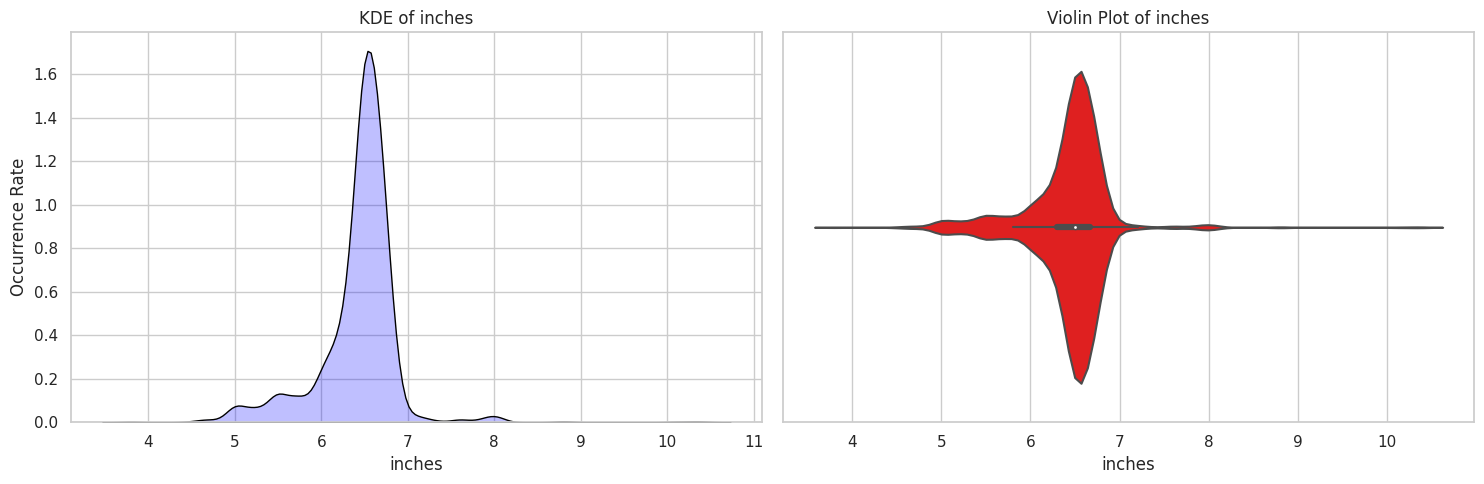

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


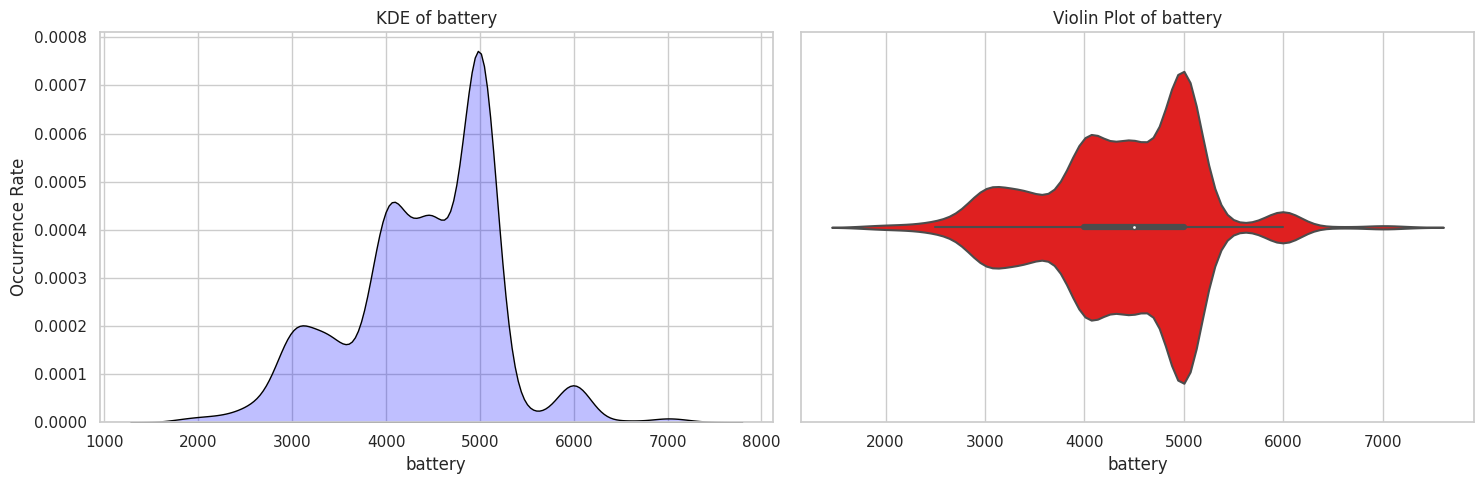

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


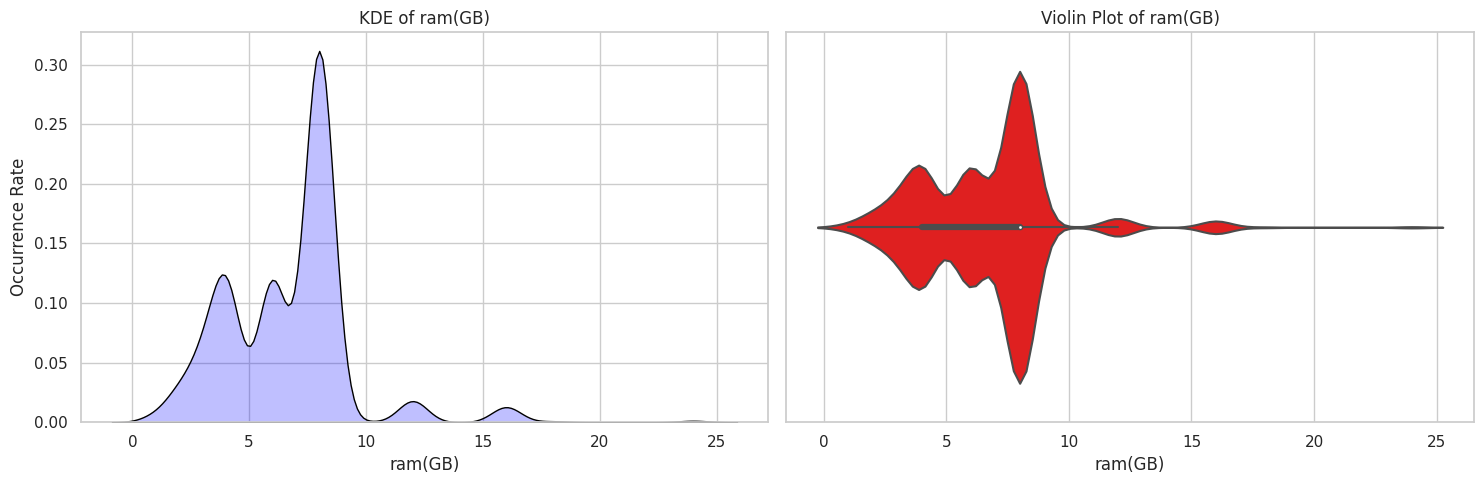

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


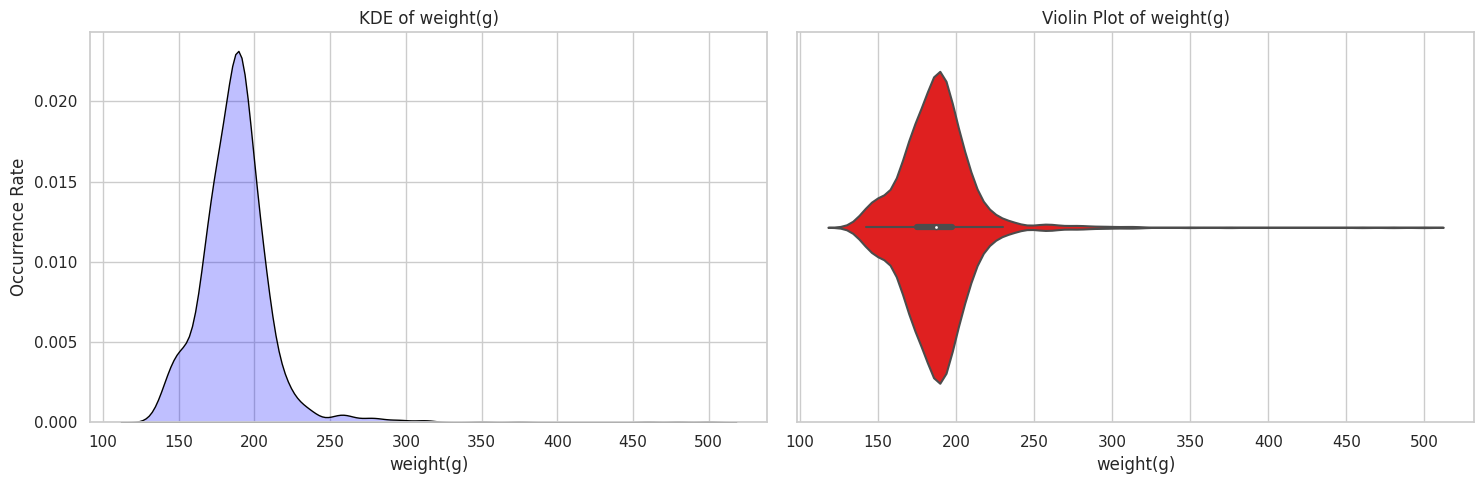

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


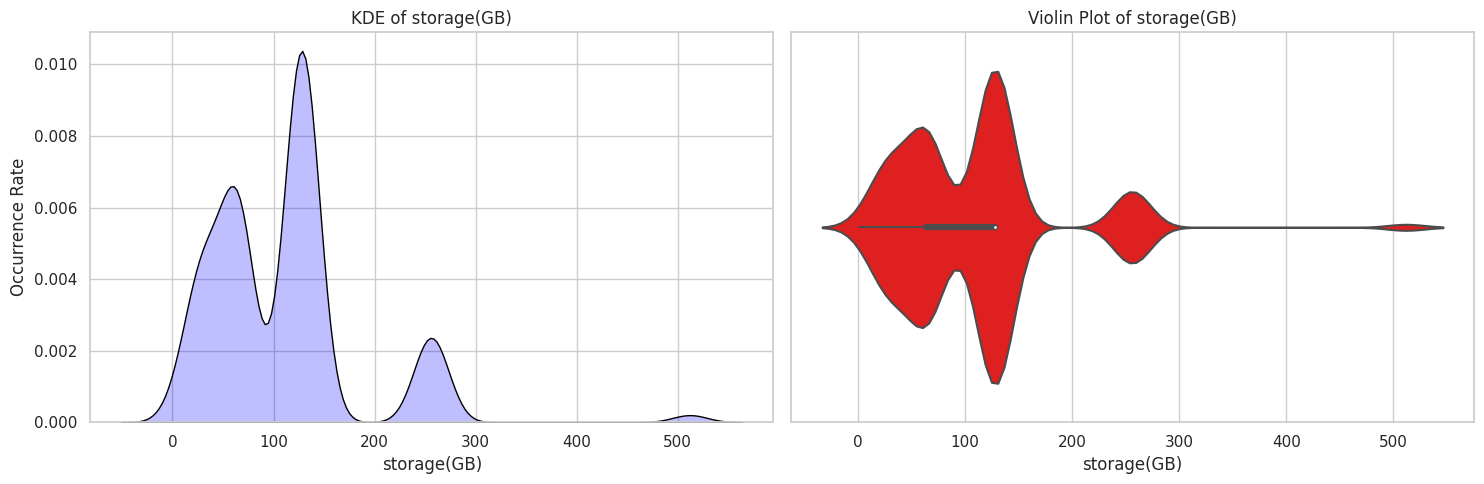

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


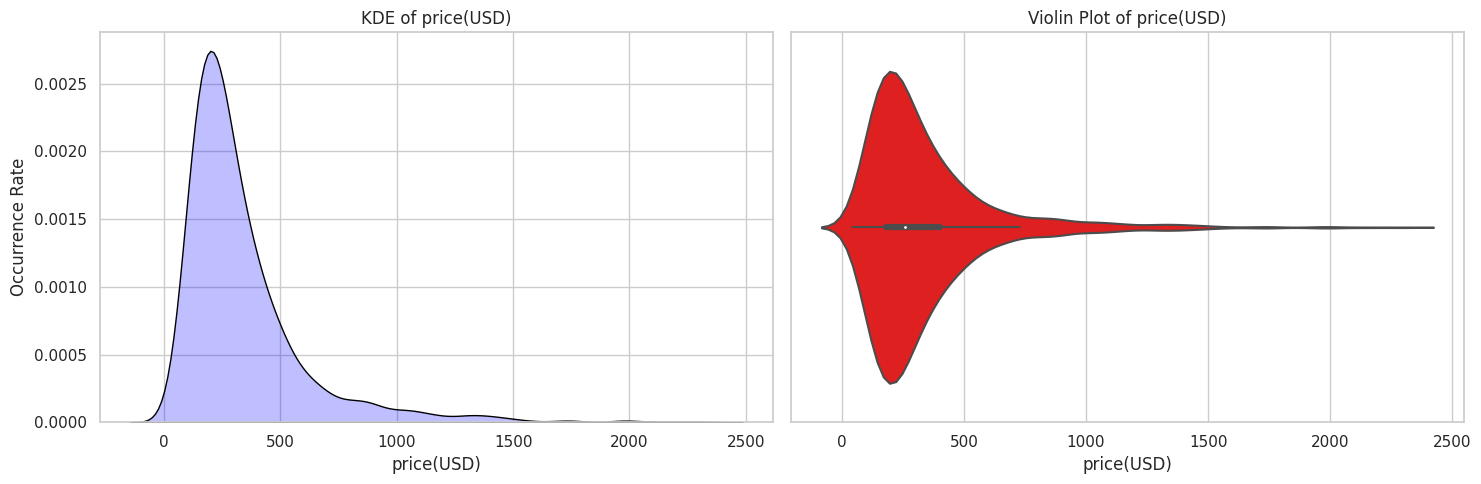

In [52]:
# Univariate analysis of numeric values

# Iteration over each numeric column
for column in numeric_data.columns:
    #setting the size of the figure
    plt.figure(figsize=(15, 5))

    # KDE Plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(numeric_data[column], fill=True, color='blue',edgecolor = 'black')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Occurrence Rate')

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x=numeric_data[column], color='red')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots

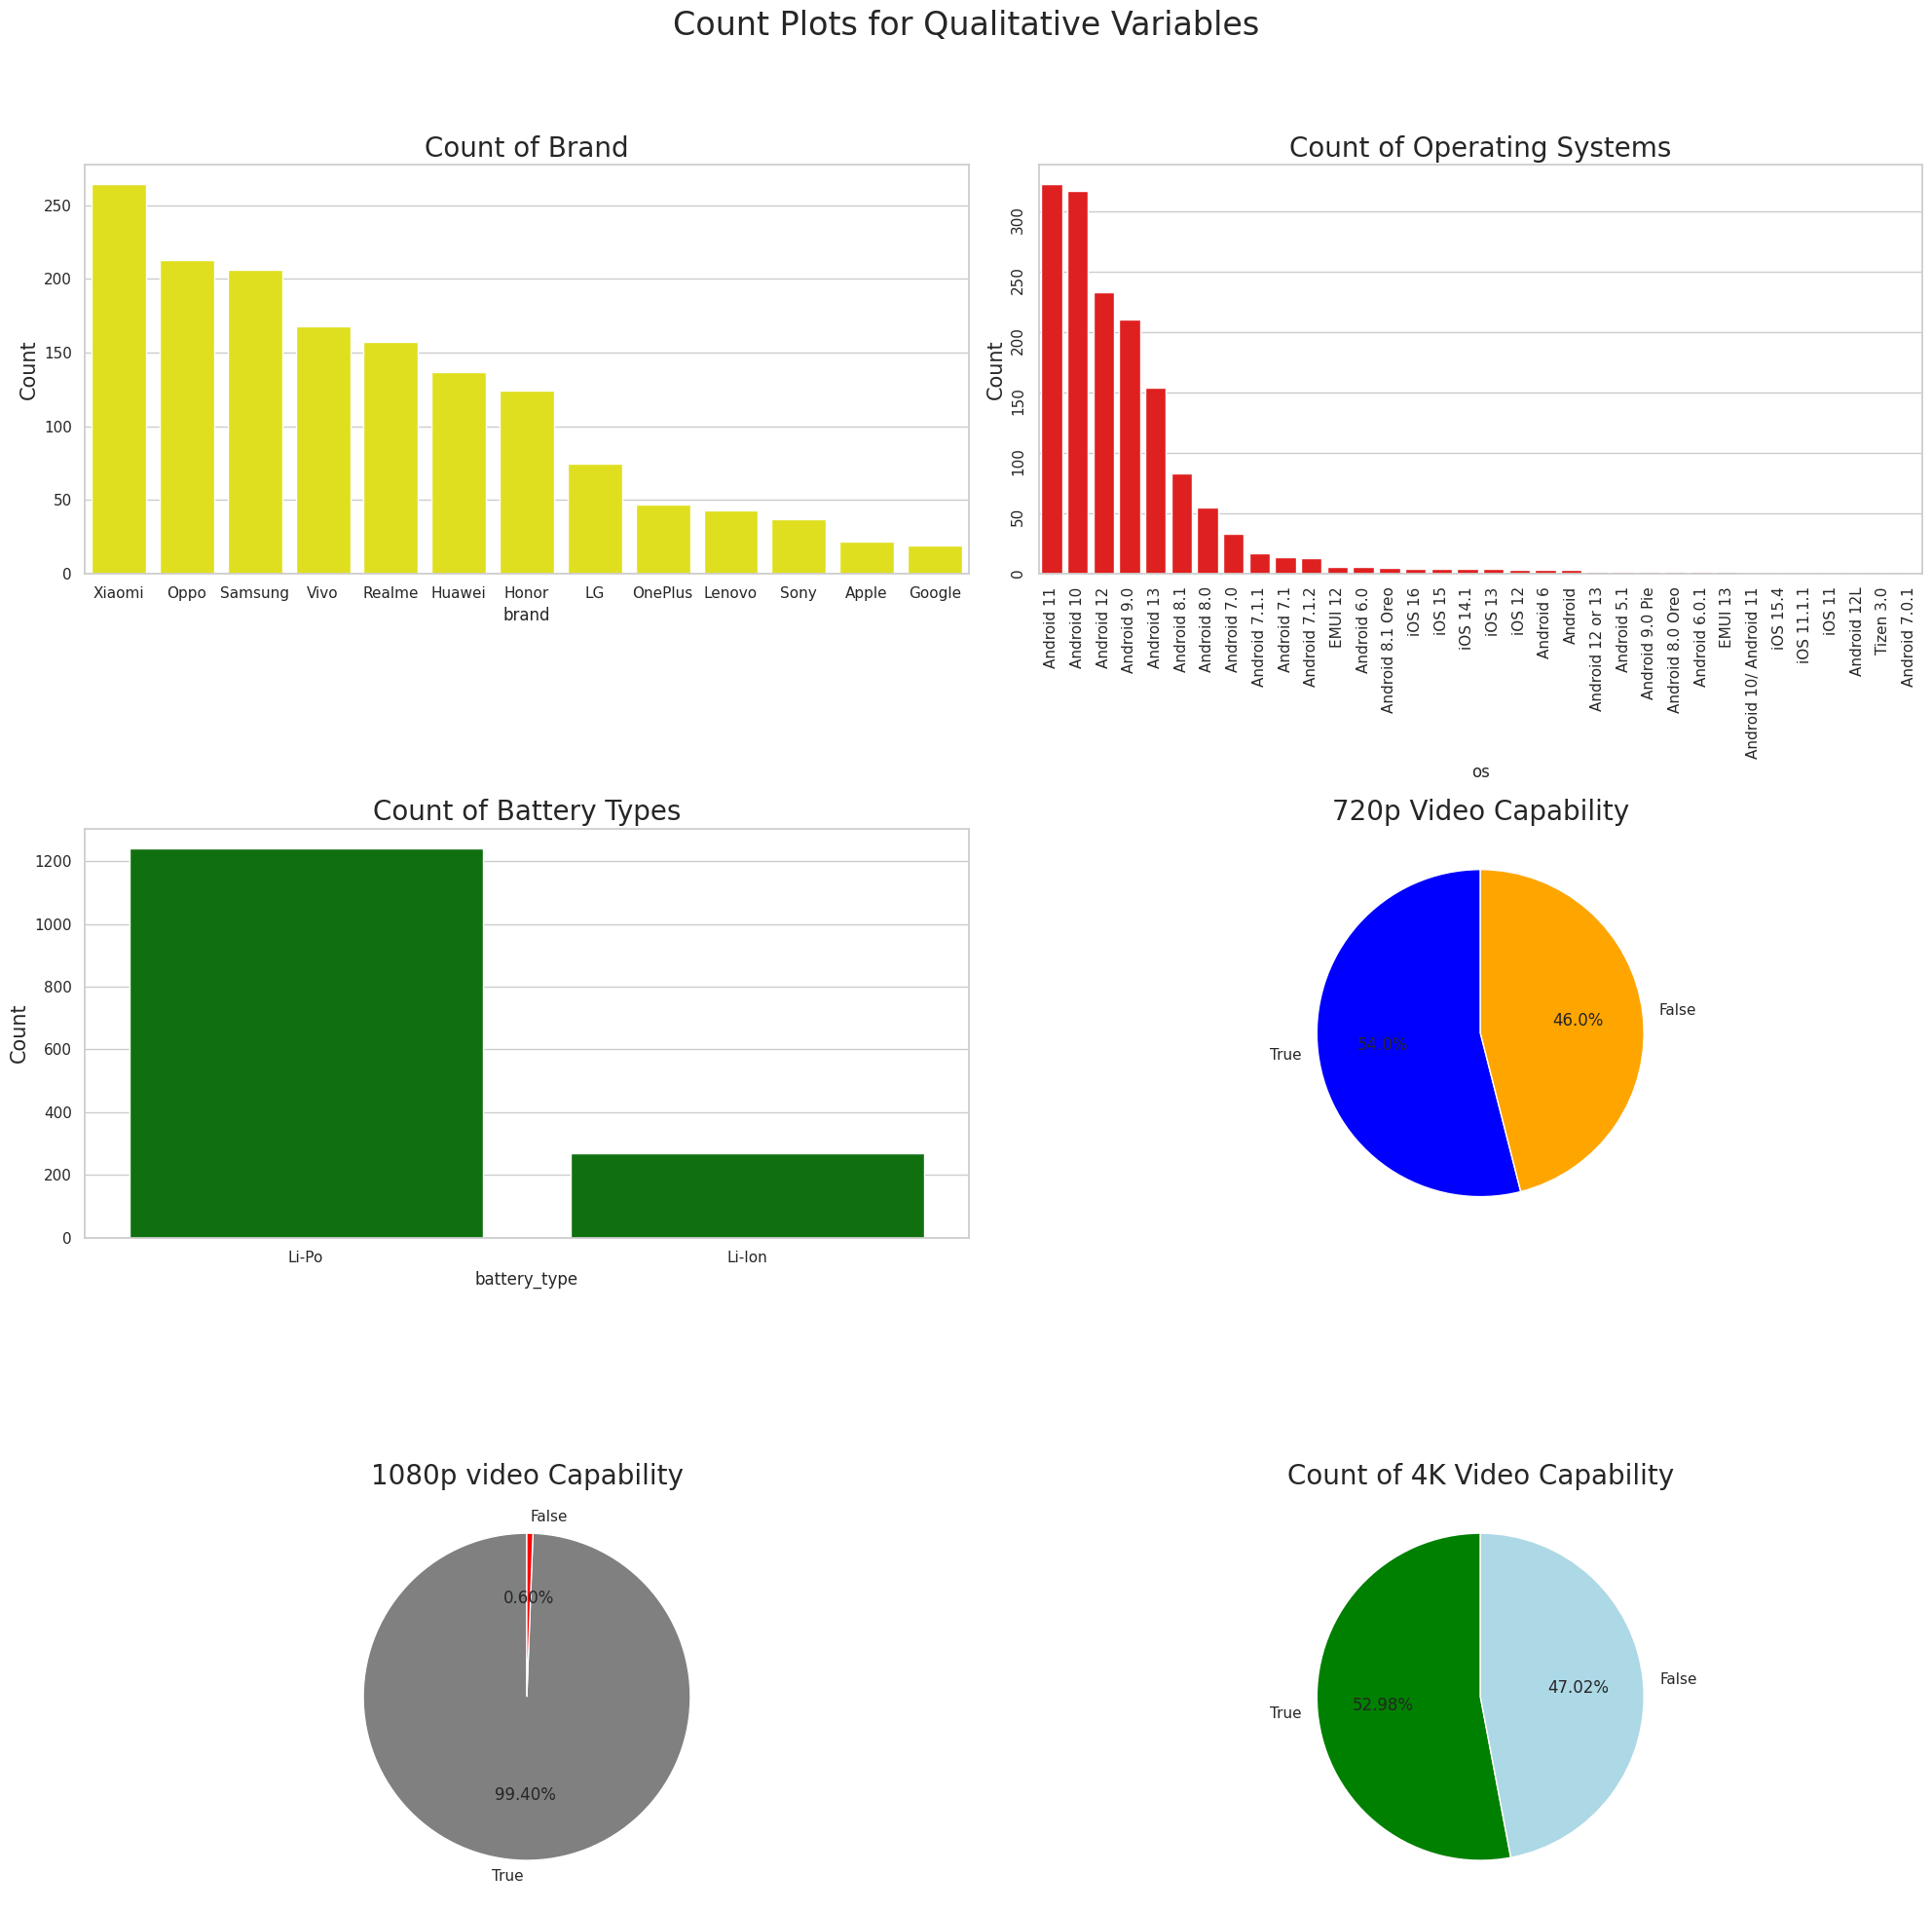

In [75]:
# Univariate analysis of categorical values

# creating a figure for the plots
fig, axes = plt.subplots(3, 2, figsize=(20,20))
#setting the title
fig.suptitle('Count Plots for Qualitative Variables', fontsize=24)

#creating the countplot for the Brand.
sns.countplot(ax = axes[0,0], x = 'brand', data = phone, color = 'yellow', order = phone['brand'].value_counts().index)
#setting the title and y label
axes[0,0].set_title('Count of Brand', fontsize = 20)
axes[0,0].set_ylabel('Count', fontsize = 15)


#Creating the countplot for OS 
sns.countplot(ax=axes[0,1], x='os', data=phone, color='red', order=phone['os'].value_counts().index)
#setting the title, y lable, and also the rotation of parameters in x
axes[0,1].set_title('Count of Operating Systems', fontsize=20)
axes[0,1].set_ylabel('Count', fontsize=15)
axes[0,1].tick_params(labelrotation=90)


#creaitng countplot for battery type
sns.countplot(ax=axes[1,0], x='battery_type', data=phone, color='green', order=phone['battery_type'].value_counts().index)
#setting the title and y label for battery type plot
axes[1,0].set_title('Count of Battery Types', fontsize=20)
axes[1,0].set_ylabel('Count', fontsize=15)

#creating a pie chart to view the video capability 720p 
video_counts = phone['video_720p'].value_counts()
axes[1,1].pie(video_counts, labels=video_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1,1].set_title('720p Video Capability', fontsize=20)

#creating the pie chart to view the video capability of 1080p 
axes[2,0].pie(phone['video_1080p'].value_counts(), labels = phone['video_1080p'].value_counts().index, autopct = '%2.2f%%', startangle = 90, colors = ['gray', 'red'])
axes[2,0].set_title('1080p video Capability', fontsize = 20)


#creating pie chart to view the video capability of 4k
axes[2,1].pie(phone['video_4K'].value_counts(), labels = phone['video_4K'].value_counts().index, autopct = '%2.2f%%', startangle = 90, colors =['green', 'lightblue'])
axes[2, 1].set_title('Count of 4K Video Capability', fontsize=20)


# Adjusting the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
#showing the plots
plt.show()

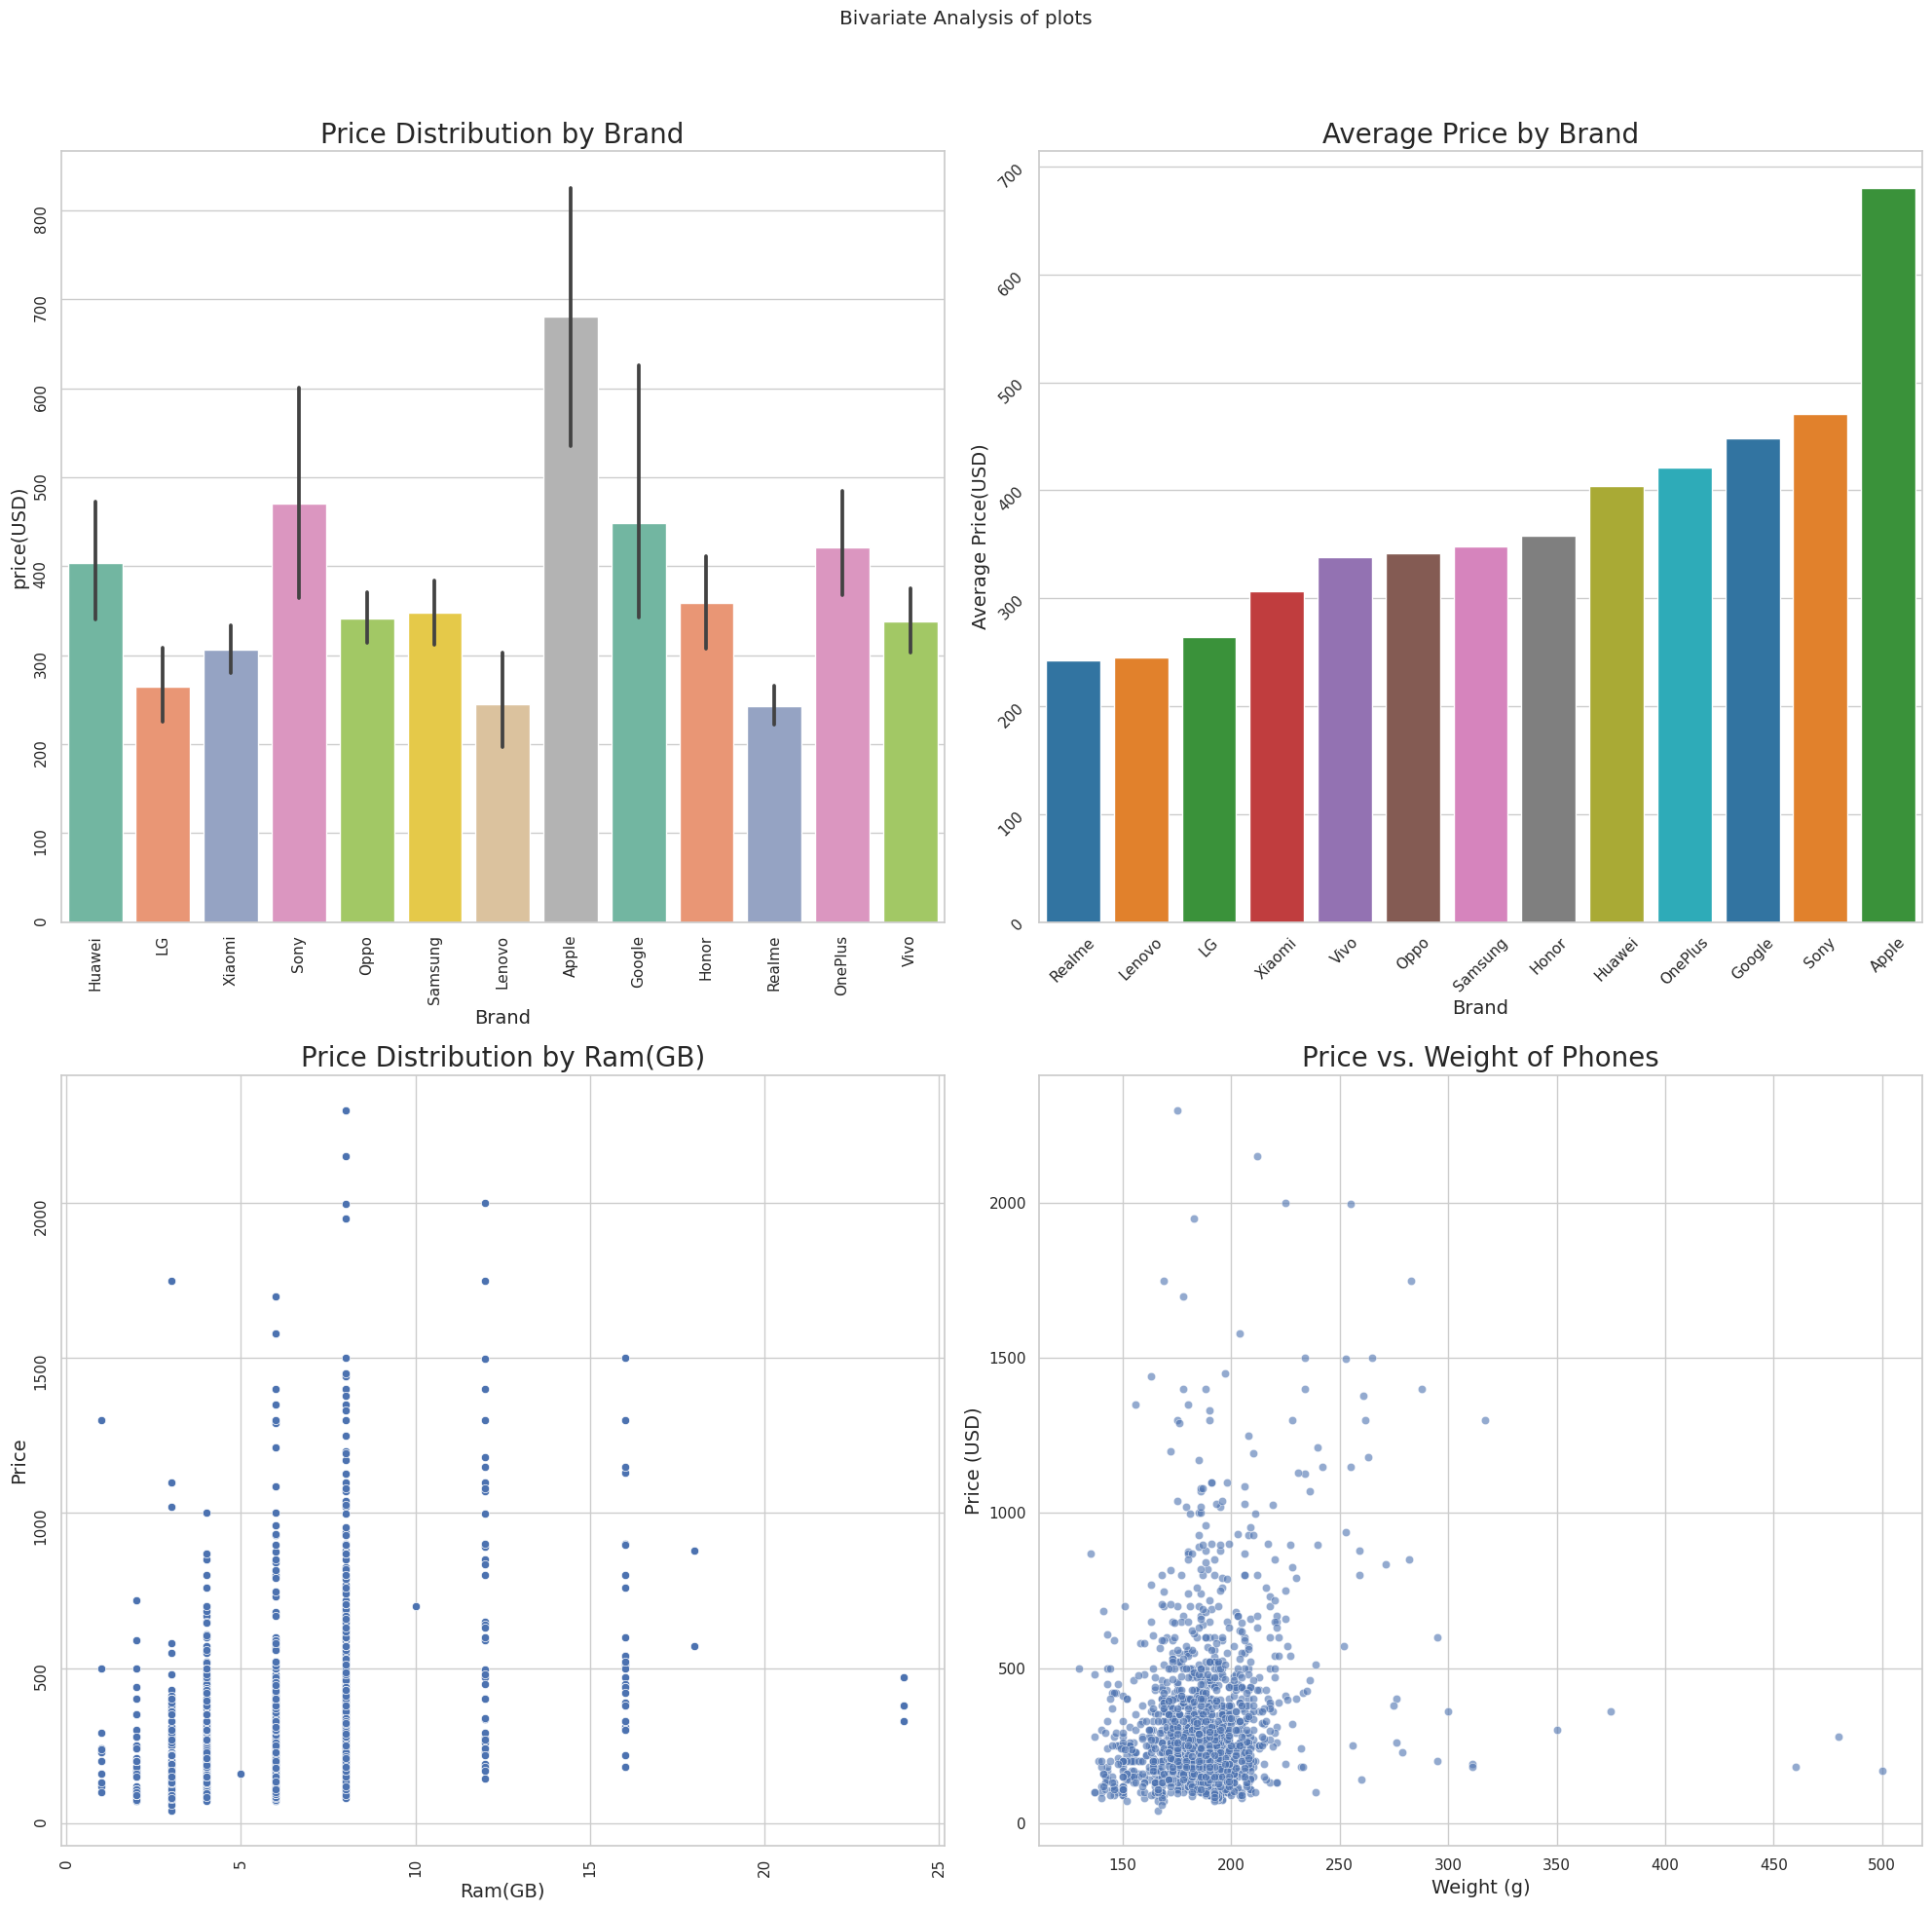

In [115]:
#Bivariate analysis

fig, axes = plt.subplots(2,2,figsize = (20, 20))
fig.suptitle("Bivariate Analysis of plots")

 
#creating the bar plot for two variable (brand and price)
sns.barplot(ax = axes[0,0], x='brand', y='price(USD)', data=phone, palette='Set2')
axes[0,0].set_title('Price Distribution by Brand', fontsize=20)
axes[0,0].set_xlabel('Brand', fontsize=14)
axes[0,0].set_ylabel('price(USD)', fontsize=14)
axes[0,0].tick_params(labelrotation=90)

#creating the barplot for the average price by each brand
mean_price = phone.groupby('brand')['price(USD)'].mean().sort_values() #calculation of mean
sns.barplot(ax = axes[0,1], x=mean_price.index, y=mean_price.values, palette='tab10')
axes[0,1].set_title('Average Price by Brand', fontsize=20)
axes[0,1].set_xlabel('Brand', fontsize=14)
axes[0,1].set_ylabel('Average Price(USD)', fontsize=14)
axes[0,1].tick_params(labelrotation=45)

#creating the scatter plot for ram by price.
sns.scatterplot(ax = axes[1,0], x = 'ram(GB)', y = 'price(USD)', data = phone)
axes[1,0].set_title('Price Distribution by Ram(GB)', fontsize = 20)
axes[1,0].set_xlabel('Ram(GB)', fontsize = 14)
axes[1,0].set_ylabel('Price', fontsize = 14)
axes[1,0].tick_params(labelrotation=90)


sns.scatterplot(ax = axes[1,1], x='weight(g)', y='price(USD)', data=phone, alpha=0.6)
axes[1,1].set_title('Price vs. Weight of Phones', fontsize=20)
axes[1,1].set_xlabel('Weight (g)', fontsize=14)
axes[1,1].set_ylabel('Price (USD)', fontsize=14)



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipykernel_30/2770250019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivariate_data['video_4K'] = multivariate_data['video_4K'].astype(str)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/si

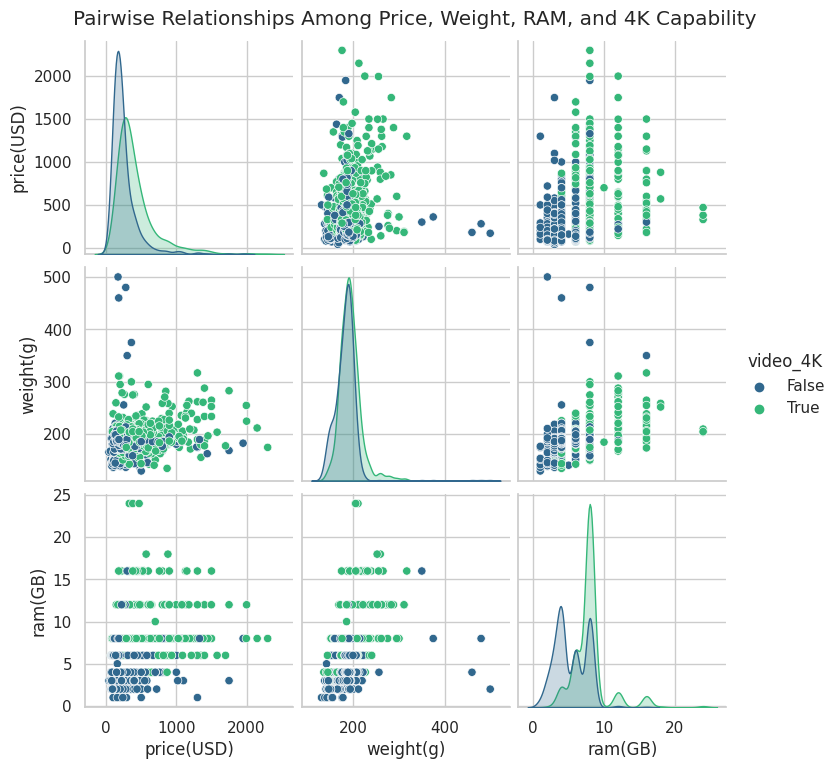

In [117]:
#Multivariate analysis 

# selecting the coloumns
multivariate_data = phone[['price(USD)', 'weight(g)', 'ram(GB)', 'video_4K']]

#converting the boolean video_4K to a string for better visualization
multivariate_data['video_4K'] = multivariate_data['video_4K'].astype(str)

#creating a pair plot
sns.pairplot(multivariate_data, hue='video_4K', palette='viridis')
plt.suptitle('Pairwise Relationships Among Price, Weight, RAM, and 4K Capability', y=1.02)
plt.show()

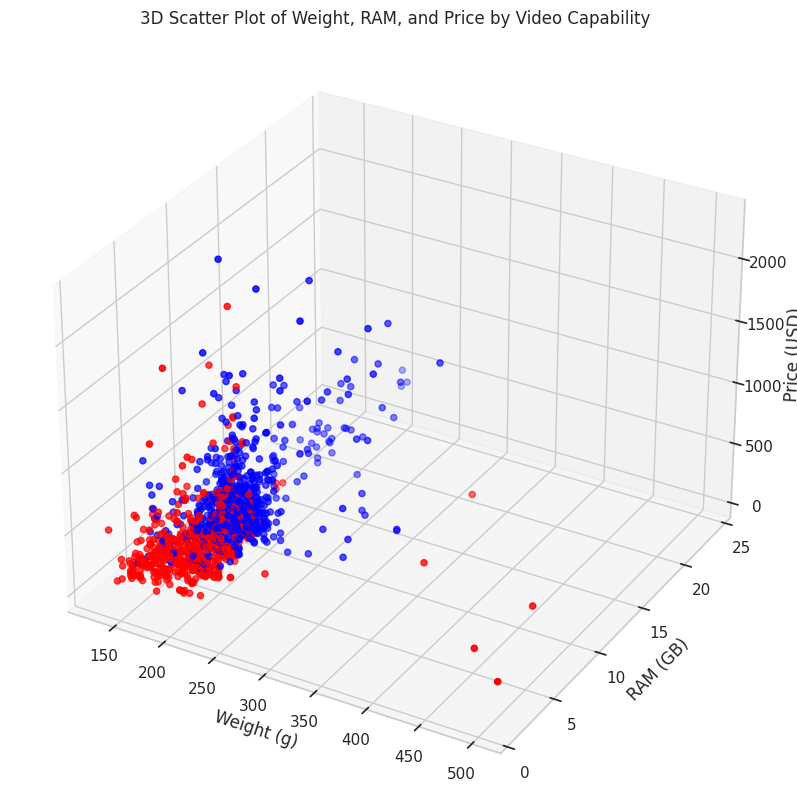

In [120]:
#Multivariate analysis in 3D


from mpl_toolkits.mplot3d import Axes3D

#creating a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

#defining the axes
x = phone['weight(g)']
y = phone['ram(GB)']
z = phone['price(USD)']
#This accesses the column in the phone data that indicates whether each phone has 4K video capability. 
#The values in this column are boolean (True or False).
c = phone['video_4K'].apply(lambda x: 'blue' if x else 'red')  

#creating the scatter plot in 3d
ax.scatter(x, y, z, c=c)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('RAM (GB)')
ax.set_zlabel('Price (USD)')
plt.title('3D Scatter Plot of Weight, RAM, and Price by Video Capability')
plt.show()